In [1]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Basic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots

In [2]:
### Parsing the Date
dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%dT%H:%M:%SZ') for d in dates]

In [3]:
#### Loading the Data
data = pd.read_csv('https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/data/noshow_appointments.csv', parse_dates=['AppointmentDay', 'ScheduledDay'], date_parser=dateparse)

In [4]:
### Seeing the First 10 Rows
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [5]:
#### Looking at the overall info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
NoShow            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [6]:
### Looking at the data
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Handling Erroneous Values
##### There seems to be some incorrect data with age. lets drop the rows with these values

In [7]:
##### There seems to be some incorrect data with age. lets drop the rows with these values
data = data.drop(data.index[data.Age <= 0],axis = 0)
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Feature Engineering 
##### The no of days between the scheduling day and the actual appointment day might be of importance.
##### The day of the week for the appointment day might also have some impact on the no show


In [8]:
#### The no of daysbetween the scheduling day and the actual appointment day might be of importance.
data['AppointmentDay'] = data['AppointmentDay'].dt.date
data['ScheduledDay'] = data['ScheduledDay'].dt.date
data['DateDiff'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

#### The day of the week for the appointment day might also have some impact on the no show
data['weekday'] = pd.to_datetime(data['AppointmentDay']).apply(lambda x: x.weekday())
data['scheduleday'] = pd.to_datetime(data['ScheduledDay']).apply(lambda x: x.weekday())
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DateDiff,weekday,scheduleday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,4
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2,4,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,4,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,4,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0,4,4
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2,4,2


In [9]:
#### Checking the data description again
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DateDiff,weekday,scheduleday
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,10.166721,1.860441,1.855683
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,15.263508,1.371457,1.378338
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,5.000000,5.000000


In [10]:
#### There seem to be some records with a negative date difference, we can drop these as well
data = data.drop(data.index[data.DateDiff < 0],axis = 0)
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DateDiff,weekday,scheduleday
count,1.069820e+05,1.069820e+05,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,1.472785e+14,5.675434e+06,38.316315,0.101036,0.203782,0.074246,0.031407,0.022957,0.323279,10.167290,1.860463,1.855677
std,2.558181e+14,7.133426e+04,22.466023,0.301377,0.402811,0.262172,0.174416,0.164064,0.467730,15.263631,1.371467,1.378363
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173345e+12,5.640488e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.172598e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000
75%,9.433627e+13,5.725639e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,5.000000,5.000000


### Handling Categorical Values

##### In this dataset we have the dependant variable being 'yes' or 'no', and 'M' or 'F' (Gender) lets convert it to 1 or 0

In [11]:
### In this dataset we have the dependant variable being 'yes' or 'no', lets convert it to 1 or 0
clean_up_categoricals = {'NoShow':{'Yes':1, 'No':0},
                         'Gender' :{"M":0, "F":1}}
data.replace(clean_up_categoricals, inplace=True)
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DateDiff,weekday,scheduleday
0,2.987250e+13,5642903,1,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4,4
1,5.589978e+14,5642503,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4,4
2,4.262962e+12,5642549,1,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4,4
3,8.679512e+11,5642828,1,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4,4
4,8.841186e+12,5642494,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4,4
5,9.598513e+13,5626772,1,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,2,4,2
6,7.336882e+14,5630279,1,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2,4,2
7,3.449833e+12,5630575,1,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2,4,2
8,5.639473e+13,5638447,1,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,0,4,4
9,7.812456e+13,5629123,1,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,2,4,2


### Next lets handle the neighbourhood categorical value

##### We can engineer a new value and replace it instead of the neighbourhood categorical value

In [12]:
#### First lets figure out how many neighbourhoods are there
count = data['Neighbourhood'].unique()
print(len(count))

81


In [13]:
##### Lets create a one hot encoded data with the neighbourhood field
one_hot_data = pd.get_dummies(data['Neighbourhood'])
print(one_hot_data)

        AEROPORTO  ANDORINHAS  ANTÔNIO HONÓRIO  ARIOVALDO FAVALESSA  \
0               0           0                0                    0   
1               0           0                0                    0   
2               0           0                0                    0   
3               0           0                0                    0   
4               0           0                0                    0   
5               0           0                0                    0   
6               0           0                0                    0   
7               0           0                0                    0   
8               0           1                0                    0   
9               0           0                0                    0   
10              0           0                0                    0   
11              0           0                0                    0   
12              0           0                0                    0   
13    

In [14]:
#### Next lets drop the Neighbourhood row from our data frame
data = data.drop('Neighbourhood',1)
#### and add the new dataframe to our existing dataframe
data = data.join(one_hot_data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 97 columns):
PatientId                      106982 non-null float64
AppointmentID                  106982 non-null int64
Gender                         106982 non-null int64
ScheduledDay                   106982 non-null object
AppointmentDay                 106982 non-null object
Age                            106982 non-null int64
Scholarship                    106982 non-null int64
Hipertension                   106982 non-null int64
Diabetes                       106982 non-null int64
Alcoholism                     106982 non-null int64
Handcap                        106982 non-null int64
SMS_received                   106982 non-null int64
NoShow                         106982 non-null int64
DateDiff                       106982 non-null int64
weekday                        106982 non-null int64
scheduleday                    106982 non-null int64
AEROPORTO                      106982

### Data Bucketisation or Data Binning
Grouping Continuos Data together into Bins / Buckets

##### In our dataset, the age is a continous feature that needs to be split into bins.

NoShow
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

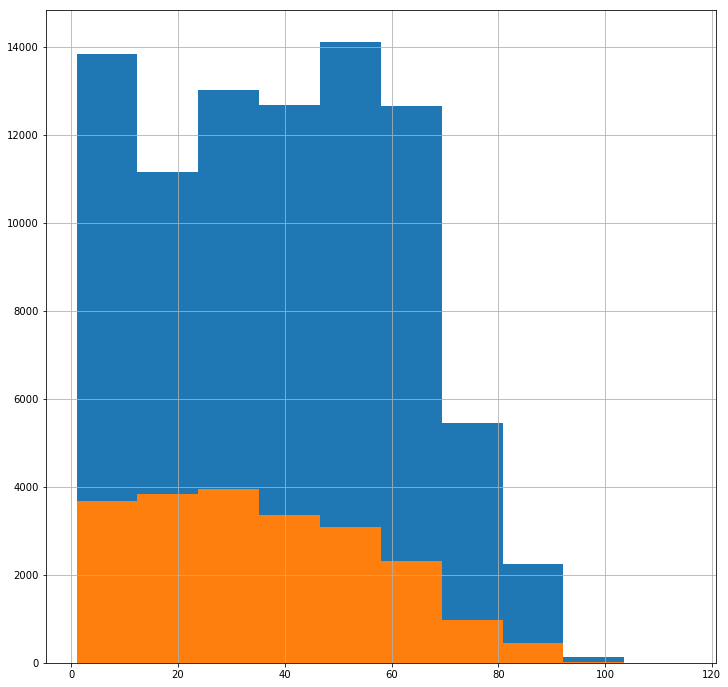

In [15]:
#### Lets explore how age has effect on no show
data.groupby('NoShow').Age.hist()

In [16]:
#### No Show rates seem to be lower for different age brackets and seem to be around 15% for 
#### 60+ / So lets Bin the ages into 4 groups - 0 - 5,5 - 14, 41 - 60, 61 +
age_bins = [-1,12,24,35,46,115]
group_names = [1,2,3,4,5]
out = pd.cut(data.Age, bins = age_bins, labels=group_names)
data['Age'] = out

NoShow
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: DateDiff, dtype: object

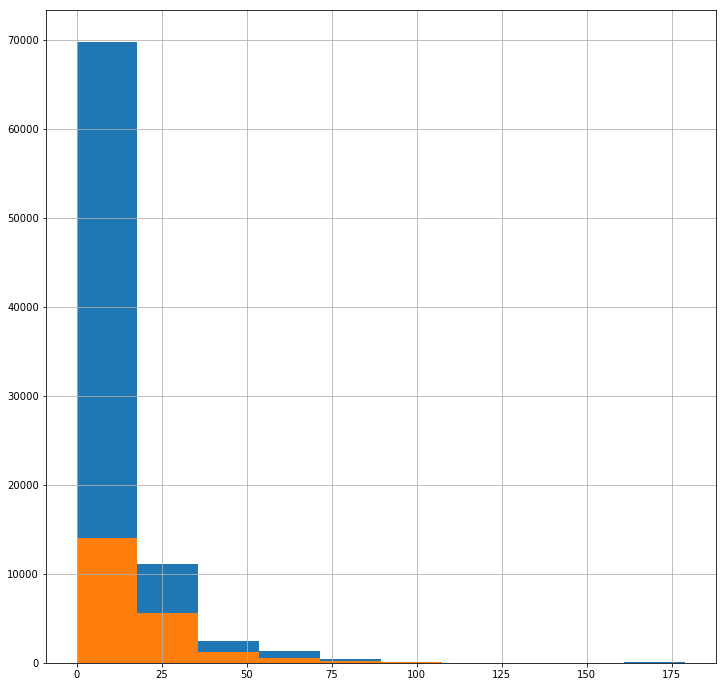

In [17]:
#### No Show rates seem to be lower when the difference between the scheduling date and the appointment date is less than 10
### We can bin these as well
data.groupby('NoShow').DateDiff.hist()

In [18]:
#### Creating Data difference bins
date_diff_bins = [-1,18,179]
group_names = [1,2]
out = pd.cut(data.DateDiff, bins = date_diff_bins, labels=group_names)
data['DateDiff'] = out

In [19]:
#### Checking if the values have been replaced
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,2.987250e+13,5642903,1,2016-04-29,2016-04-29,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29,2016-04-29,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29,2016-04-29,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29,2016-04-29,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29,2016-04-29,5,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,9.598513e+13,5626772,1,2016-04-27,2016-04-29,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7.336882e+14,5630279,1,2016-04-27,2016-04-29,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.449833e+12,5630575,1,2016-04-27,2016-04-29,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5.639473e+13,5638447,1,2016-04-29,2016-04-29,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7.812456e+13,5629123,1,2016-04-27,2016-04-29,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#### Lets ensure our data doesnt contain any Null Values
nans = lambda data: data[data.isnull().any(axis=1)]
nans(data)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM


###  Next Lets Choose our Features and Try to Do Classification


In [21]:
### We will use a dataframe 'X' to store our features or independent variable and a list 'y' to store our dependant variable

X = data
X = X.drop('NoShow',1)
X = X.drop('PatientId',1)
X = X.drop('AppointmentID',1)
X = X.drop('ScheduledDay',1)
X = X.drop('AppointmentDay',1)
X = X.drop('weekday', 1)
#X = X.drop('Neighbourhood', 1)
#X = X.drop('Gender', 1)
y = data['NoShow'].values

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 91 columns):
Gender                         106982 non-null int64
Age                            106982 non-null category
Scholarship                    106982 non-null int64
Hipertension                   106982 non-null int64
Diabetes                       106982 non-null int64
Alcoholism                     106982 non-null int64
Handcap                        106982 non-null int64
SMS_received                   106982 non-null int64
DateDiff                       106982 non-null category
scheduleday                    106982 non-null int64
AEROPORTO                      106982 non-null uint8
ANDORINHAS                     106982 non-null uint8
ANTÔNIO HONÓRIO                106982 non-null uint8
ARIOVALDO FAVALESSA            106982 non-null uint8
BARRO VERMELHO                 106982 non-null uint8
BELA VISTA                     106982 non-null uint8
BENTO FERREIRA                 1069

In [23]:
X['Age'] = pd.to_numeric(X['Age'])
#X['Neighbourhood'] = pd.to_numeric(X['Neighbourhood'])
X['DateDiff'] = pd.to_numeric(X['DateDiff'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 91 columns):
Gender                         106982 non-null int64
Age                            106982 non-null int64
Scholarship                    106982 non-null int64
Hipertension                   106982 non-null int64
Diabetes                       106982 non-null int64
Alcoholism                     106982 non-null int64
Handcap                        106982 non-null int64
SMS_received                   106982 non-null int64
DateDiff                       106982 non-null int64
scheduleday                    106982 non-null int64
AEROPORTO                      106982 non-null uint8
ANDORINHAS                     106982 non-null uint8
ANTÔNIO HONÓRIO                106982 non-null uint8
ARIOVALDO FAVALESSA            106982 non-null uint8
BARRO VERMELHO                 106982 non-null uint8
BELA VISTA                     106982 non-null uint8
BENTO FERREIRA                 106982 non

In [24]:
#### Feature Scaling - Lets scale the Features to ensure they are all in the same range
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

/home/pracas/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pracas/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
#### Next Split the dataset into Training & Test Sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [26]:
#### Lets create a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [31]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)

##### K Nearest Neighbours
A New Data point is mapped to either one of the 2 groups based on the number of k nearest neighbours of the data point
The new data point is mapped to that group to which maximum of its k nearest neighbours belong

In [37]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) ### Minkowski with p = 2 corresponds to euclidean distance

##### Logistic Regression
Logistic Regression uses the logistic function to find a model that fits with the data points. The function gives an 'S' shaped curve to model the data. The curve is restricted between 0 and 1, so it is easy to apply when y is binary. 

Logistic Regression can then model events better than linear regression, as it shows the probability for y being 1 for a given x value.

In [33]:
# Fitting Logistic Regression Classifier to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

#####  Naive Bayes Intuition
Naive Bayes is not a single algorithm but a family of algorithms that all share a common principle.

##### The Principle
Every feature being classified is independent of the value of any other feature. So for example, a fruit may be considered to be an apple if it is red, round, and about 3″ in diameter. A Naive Bayes classifier considers each of these “features” (red, round, 3” in diameter) to contribute independently to the probability that the fruit is an apple, regardless of any correlations between features. Features, however, aren’t always independent which is often seen as a shortcoming of the Naive Bayes algorithm and this is why it’s labeled “naive”.

In [32]:
#### Fitting a Naive Bayes Classifier to the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [38]:
#### Fit the classifier to the training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
### Predict the results
y_pred = classifier.predict(X_test)

In [41]:
#### Lets see the accuracy rate of our predictions
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7713805028507337


#### Confusion Matrix
        Predictions
        0    |   1
 True   -----------
     0 | TN  | FP  |
       |-----------
     1 | FN  | TP  |
       |-----------|
     

In [31]:
### Lets create a Confusion Matrix to See how valid our accuracy score is
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels =['Pr 0', 'Pr 1']
print(*labels)
for line in cm:
    print(*line)

Pr 0 Pr 1
7908 651
1772 368


#### The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

#### The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.


#### The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:     F1 = 2 * (precision * recall) / (precision + recall)

In [39]:
#### Lets take a look at the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85      8559
          1       0.33      0.21      0.26      2140

avg / total       0.72      0.76      0.73     10699



In [40]:
#### Finally Lets Apply k-Fold Cross Validation to see how our model has performed
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.7548996250943912
0.0027316466907199707
